In [1]:
import pandas as pd
import seaborn as sns
results = pd.read_csv('results.csv', index_col=None)
for name in ['_no_block', '_cbh', '_degree']:
    results['total' + name] = sum(results[str(i)+name] for i in range(1, 4)).subtract(20) 
results.head()
sns.set()
print(results.columns)

Index(['network_name', 'threshold', 'seed_size', 'budget_total', 'budget_1',
       'budget_2', '0_no_block', '1_no_block', '2_no_block', '3_no_block',
       '0_cbh', '1_cbh', '2_cbh', '3_cbh', '0_degree', '1_degree', '2_degree',
       '3_degree', 'total_no_block', 'total_cbh', 'total_degree'],
      dtype='object')


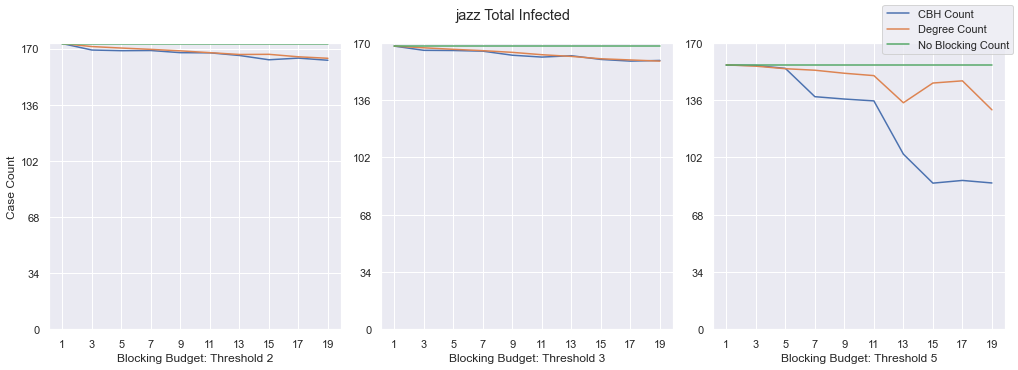

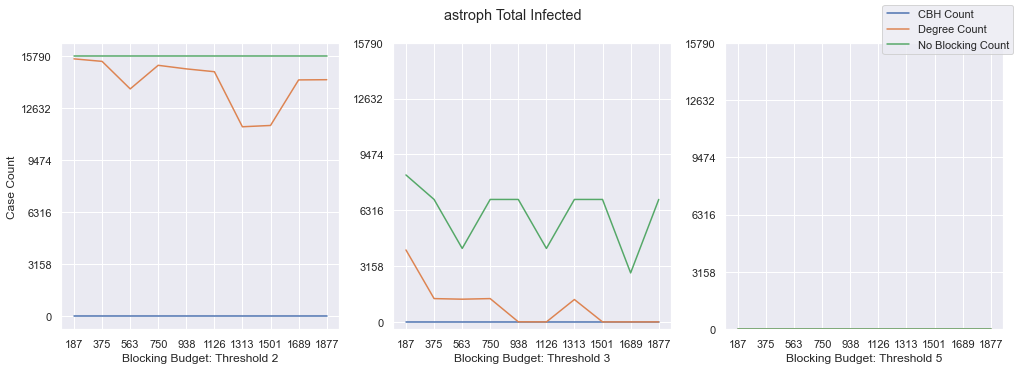

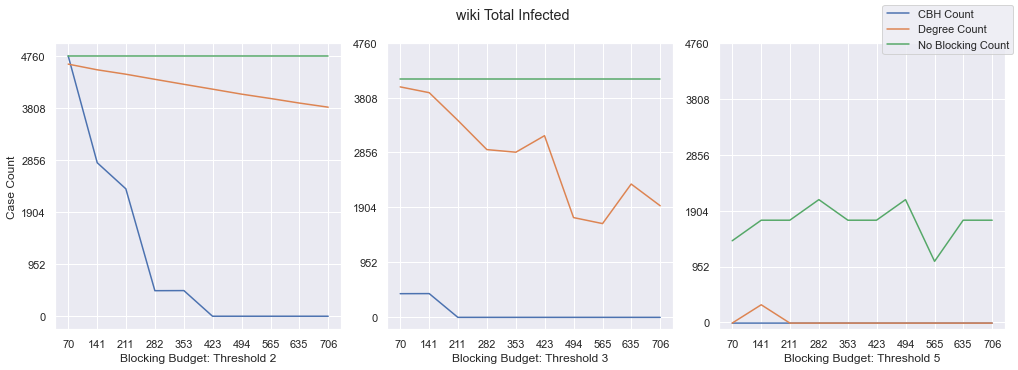

In [2]:
import matplotlib.pyplot as plt
import numpy as np
names = ['jazz', 'astroph', 'wiki']
thres = [2, 3, 5]

for name in names:
    threshold = results[results.network_name == name]
    fig, ax = plt.subplots(1,3, figsize=(14, 5))
    fig.suptitle(name + " Total Infected")
    threshold = threshold[threshold.seed_size == 10]
    my_range = np.arange(0, max(list(threshold.total_no_block)[:-1]), max(list(threshold.total_no_block)[:-1]) // 5)
    for i in range(len(thres)):
        subdf = threshold[threshold.threshold == thres[i]]
        cbh, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_cbh)[:-1])
        degree, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_degree)[:-1])
        no_block, = ax[i].plot(list(subdf.budget_total)[:-1], list(subdf.total_no_block)[:-1])
        ax[i].set_xticks(list(subdf.budget_total)[:-1])
        ax[i].set_yticks(my_range)
    fig.tight_layout(pad=1)
    fig.legend([cbh, degree, no_block], ['CBH Count', "Degree Count", "No Blocking Count"])
    for i in range(3):
        ax[i].set_xlabel("Blocking Budget: Threshold " + str(thres[i]))
    ax[0].set_ylabel("Case Count")
    plt.savefig("infected_cnt_" + name + ".pdf")

In [9]:
astroph = results[(results.network_name == "astroph")]

astro_sub_df = astroph[['total_no_block', 'threshold', 'total_degree', 'total_cbh', 'budget_total' ]]
astro_sub_df

,total_no_block,threshold,total_degree,total_cbh,budget_total
36,15812,2,15812,20,375
37,13872,3,13872,20,375
38,20,5,20,20,375
39,15812,2,15812,20,750
40,13872,3,13872,20,750
41,20,5,20,20,750
42,15812,2,15812,20,1126
43,13872,3,13872,20,1126
44,20,5,20,20,1126
45,15812,2,15812,20,1877
